<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/subjects/tools/tools_get_list_of_videos_from_youtube_playlist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting metadata for all videos in a youtube playlist
Simple code that can be used to get a full list of videos from the youtube playlist. Such output can then be used for example as a checklist for tracking of the learning progress.

**Input**
* youtube playlist url

**Output**
* dataframe with list of videos: | title | description | length | url |

**Extensions**

Pytube package supports downloading of youtube videos, so if needed this notebook could be extended to download all videos from the playlist.

In [4]:
# uncomment to install library for interacting with youtube
# https://pytube.io/en/latest/user/quickstart.html
# !pip install pytube

In [26]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, HTML, Image
from pytube import Playlist

## Playlist details

In [6]:
# configuration
# set the url of the channel you want to download videos from
p = Playlist('https://www.youtube.com/playlist?list=PLwJRxp3blEvZ8AKMXOy0fc0cqT61GsKCG')

A Student's Guide to Bayesian Statistics


There are some ideas we know are true, and others we know are false. However for the majority of ideas we do not know if they are true or false; for these we say we  are ‘uncertain’. For these uncertain entities the correct way to quantify our ignorance  is to use the language of probability. Bayesian inference uses probability theory to allow us to update our uncertain beliefs in light of data. 

Bayesian inference is increasingly used across the social, biological and physical sciences. As such, a working knowledge of Bayesian statistics is essential for researchers in these fields. However many of the texts on Bayesian statistics are hard to penetrate; being densely-packed with mathematical formulae, and sparse explanation. This course aims to provide a core understanding of Bayesian statistics  that is grounded in mathematical theory, yet friendly to the less mathematically-minded of persons. It aims to focus on the intuitive results of Ba

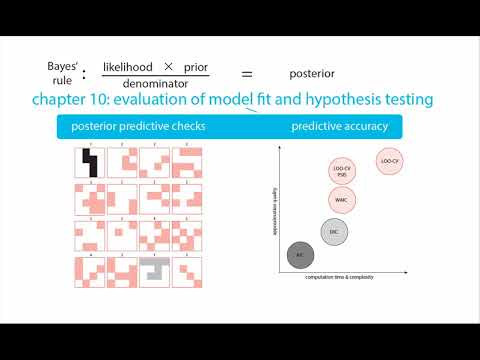

In [7]:
# this is optional, you can comment this out
# at this moment getting description for playlist in pytube does not work
# it is likely because the metadata structure of objects in sidebar can change
# so this code fixes it by using the current schema and extends by getting url of image

# getting information about the playlist
title = p.title
sidebar_info = p.sidebar_info[0]
description = sidebar_info['playlistSidebarPrimaryInfoRenderer']['description']['runs'][0]['text']
thumbnail = sidebar_info['playlistSidebarPrimaryInfoRenderer']['thumbnailRenderer']['playlistVideoThumbnailRenderer']['thumbnail']['thumbnails'][0]['url']
image_url = thumbnail.split('jpg')[0] +'jpg'

#displaying info
print(title)
print('\n')
print(description)
Image(image_url)

## Getting details of all videos in playlist

In [8]:
# download all urls for the playlist
urls = p.video_urls
# download title, description and length
l = []
for video in p.videos:
  # for description I just need the first line, that might differ for other playlists
  title, description, length = video.title, video.description.split('\n')[0], video.length
  l.append([title, description, length])

In [23]:
# creating dataframe
cols = ['title', 'description', 'length']
df = pd.DataFrame(data = l, columns = cols)
df['url'] = urls
# round up to minutes 
df['length_minutes'] = np.ceil(df['length']/60).astype(int)
df

,title,description,length,url,length_minutes
0,The syllabus covered by the book and YouTube c...,This video provides a summary of a textbook I'...,927,https://www.youtube.com/watch?v=P_og8H-VkIY,16
1,Random variables and probability distributions.,This video explains what are meant by random v...,466,https://www.youtube.com/watch?v=pvkhK03aFDM,8
2,An introduction to discrete probability distri...,This video introduces discrete probability dis...,376,https://www.youtube.com/watch?v=4Ghtj_iTSpI,7
3,An introduction to continuous probability dist...,This video introduces continuous probability d...,495,https://www.youtube.com/watch?v=s87mffcX0xU,9
4,Two-dimensional discrete distributions: an int...,This video introduces two-dimensional discrete...,310,https://www.youtube.com/watch?v=trWTk31jYQU,6
...,...,...,...,...,...
70,How to code up a bespoke probability density i...,This video explains how to use Stan to sample ...,875,https://www.youtube.com/watch?v=CMSMtcMYHdM,15
71,How to write your first Stan program,This video explains how to write and run a Sta...,1727,https://www.youtube.com/watch?v=YZZSYIx1-mw,29
72,How to code up a model with discrete parameter...,This video explains how to use Stan to sample ...,1295,https://www.youtube.com/watch?v=KOIudAB6vJ0,22
73,The distribution zoo app to help to understand...,This video introduces an app called 'The distr...,586,https://www.youtube.com/watch?v=mGaZHhGwF4Y,10


## Get high-level stats of the playlist

In [25]:
# get playlist length including number of videos and duration stats
df['length_minutes'].agg(['count','sum','median','mean'])

count      75.00
sum       867.00
median     10.00
mean       11.56
Name: length_minutes, dtype: float64

### Export formatted links

In [10]:
# output list of titles as hyperlinks for pasting into checklist (google doc)
hyperlink_format = '<a href="{link}">{text}</a>'

titles = df['title'].values
links = df['url'].values

for a in zip(titles, links):
  display(HTML(hyperlink_format.format(link=a[1], text=a[0])))

## References

1) https://pytube.io/en/latest/api.html#pytube.YouTube

2) https://stackoverflow.com/questions/54710982/using-pytube-to-download-playlist-from-youtube